In [1]:
import pandas as pd
features = pd.read_csv('/kaggle/input/nk-sec/X_train .csv')
targets = pd.read_csv('/kaggle/input/nk-sec/Y_train_call.csv')

In [2]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = []
for i in range(targets.shape[1]):
    mi = mutual_info_regression(features, targets.iloc[:, i])
    mi_scores.append(mi)

In [3]:
import numpy as np
# Convert to a (52, 43) matrix and aggregate if needed
mi_scores = np.array(mi_scores)
average_mi = mi_scores.mean(axis=0)  # Average across targets

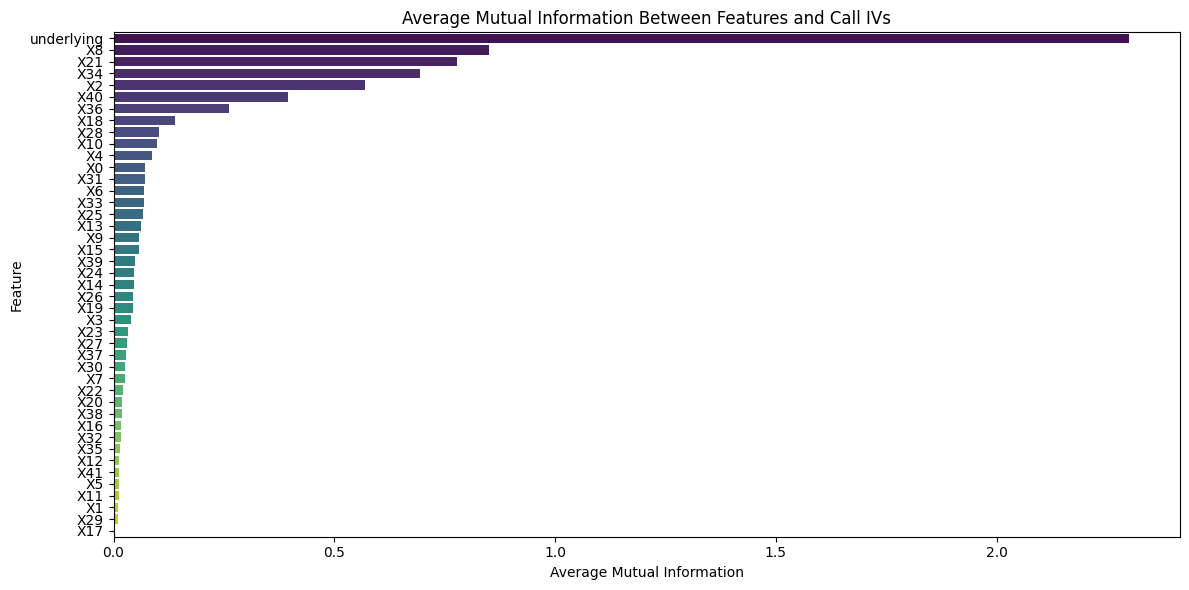

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store feature names and their average MI scores
mi_df = pd.DataFrame({
    'Feature': features.columns,
    'Avg_MI': average_mi
})

# Sort by average MI for better visualization
mi_df = mi_df.sort_values(by='Avg_MI', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_MI', y='Feature', data=mi_df, palette='viridis')
plt.title('Average Mutual Information Between Features and Call IVs')
plt.xlabel('Average Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

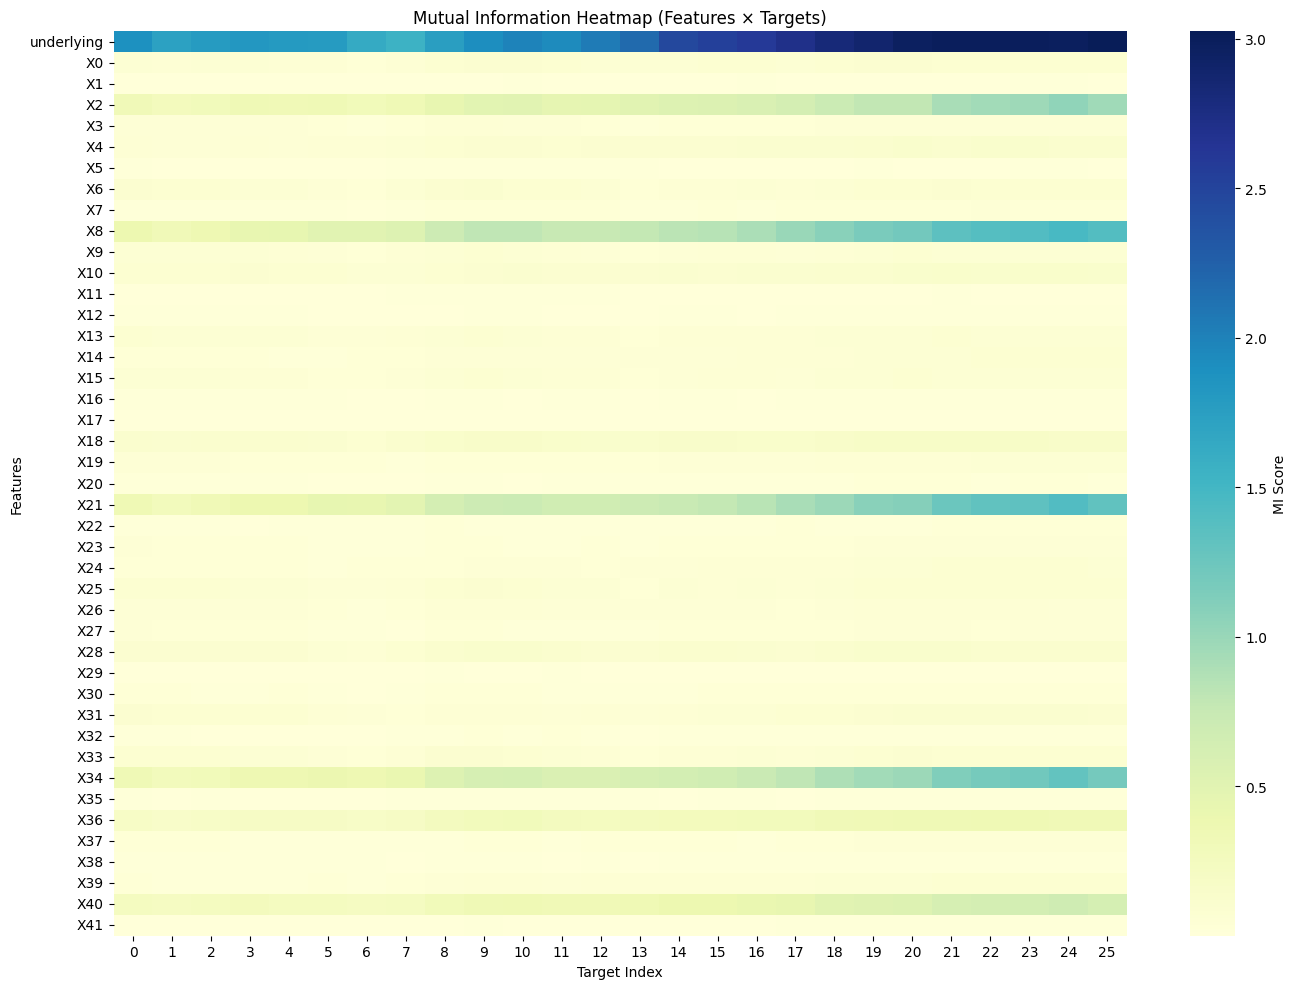

In [9]:
# Create heatmap DataFrame
mi_matrix_df = pd.DataFrame(mi_scores, columns=features.columns)

plt.figure(figsize=(14, 10))
sns.heatmap(mi_matrix_df.T, cmap='YlGnBu', annot=False, cbar_kws={'label': 'MI Score'})
plt.title('Mutual Information Heatmap (Features × Targets)')
plt.xlabel('Target Index')
plt.ylabel('Features')
plt.tight_layout()
plt.show()